# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# normalization
X_train = X_train /255.0
X_test = X_test /255.0

# encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential(
    [
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
]
)



**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [6]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10,batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 37s 95ms/step - loss: 0.2296 - accuracy: 0.9344 - val_loss: 0.0722 - val_accuracy: 0.9784
Epoch 2/10
375/375 [==============================] - 36s 97ms/step - loss: 0.0605 - accuracy: 0.9813 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 3/10
375/375 [==============================] - 34s 90ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0487 - val_accuracy: 0.9852
Epoch 4/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 5/10
375/375 [==============================] - 34s 92ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0388 - val_accuracy: 0.9891
Epoch 6/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0409 - val_accuracy: 0.9888
Epoch 7/10
375/375 [==============================] - 36s 97ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0343 - val_accuracy:

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 2s 7ms/step - loss: 0.0322 - accuracy: 0.9896
Test Accuracy: 0.9896000027656555


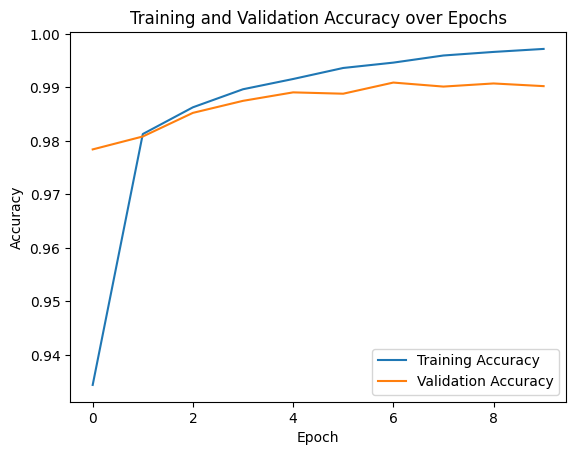

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
